![Dr. Semmelweis](ignaz_semmelweis_1860.jpeg)

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on June 1st, 1847, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital.

The data is stored as two CSV files within the `data` folder.

`yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [24]:
# Imported libraries
library(tidyverse)

# Start coding here..
yearly <- read.csv("data/yearly_deaths_by_clinic.csv")
monthly <- read.csv("data/monthly_deaths.csv")

In [25]:
head(yearly)

,year,births,deaths,clinic
,<int>,<int>,<int>,<chr>
1,1841,3036,237,clinic 1
2,1842,3287,518,clinic 1
3,1843,3060,274,clinic 1
4,1844,3157,260,clinic 1
5,1845,3492,241,clinic 1
6,1846,4010,459,clinic 1


In [26]:
head(monthly)

,date,births,deaths
,<chr>,<int>,<int>
1,1841-01-01,254,37
2,1841-02-01,239,18
3,1841-03-01,277,12
4,1841-04-01,255,4
5,1841-05-01,255,2
6,1841-06-01,200,10


In [27]:
# Add a new column called proportion_deaths

monthly <- monthly %>% mutate(proportion_deaths = deaths/births)
yearly <- yearly %>% mutate(proportion_deaths = deaths/births)
head(monthly)

,date,births,deaths,proportion_deaths
,<chr>,<int>,<int>,<dbl>
1,1841-01-01,254,37,0.145669291
2,1841-02-01,239,18,0.075313808
3,1841-03-01,277,12,0.043321300
4,1841-04-01,255,4,0.015686275
5,1841-05-01,255,2,0.007843137
6,1841-06-01,200,10,0.050000000


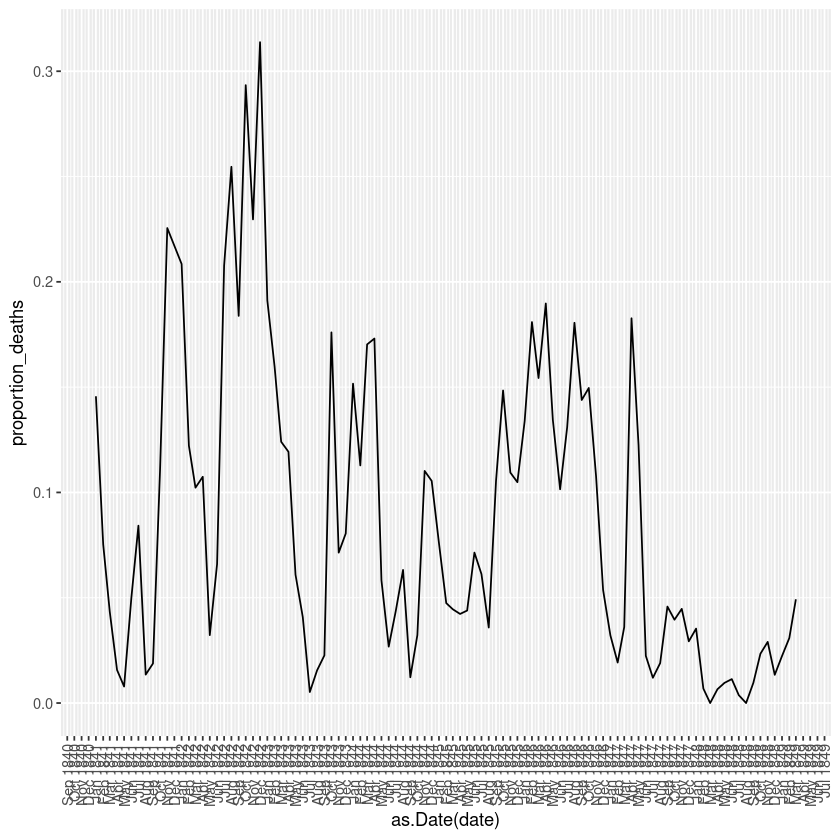

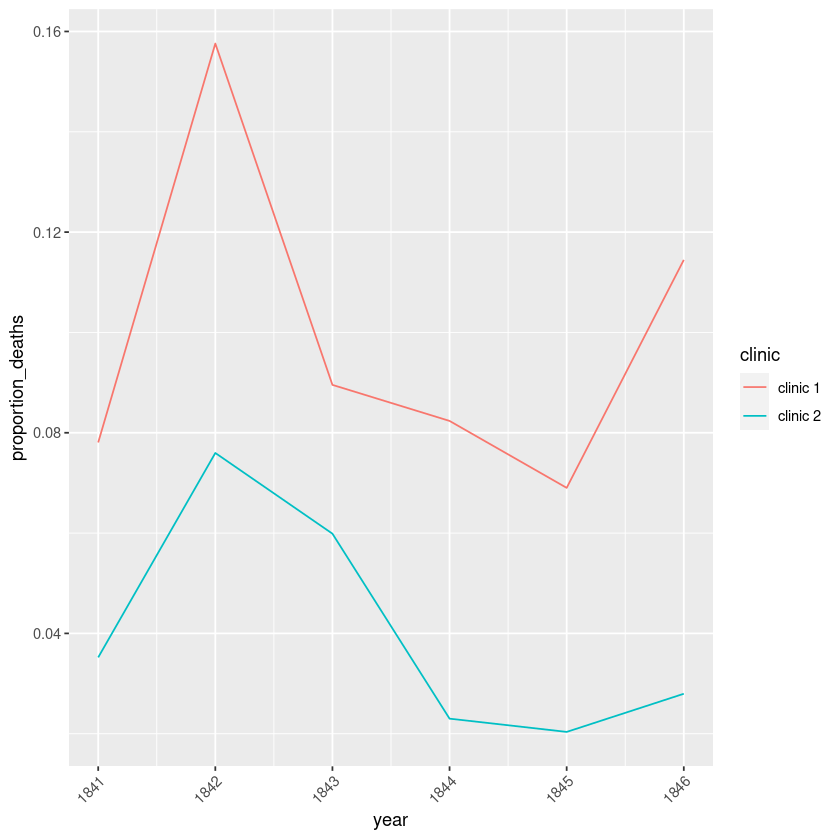

In [34]:
# For the monthly plot with added space in the x axis
ggplot(monthly, aes(x = as.Date(date), y = proportion_deaths)) + 
  geom_line() + 
  scale_x_date(date_breaks = "1 month", date_labels = "%b %Y") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5))

# For the yearly plot with different colored lines for each clinic and added space in the x axis
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) + 
  geom_line() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

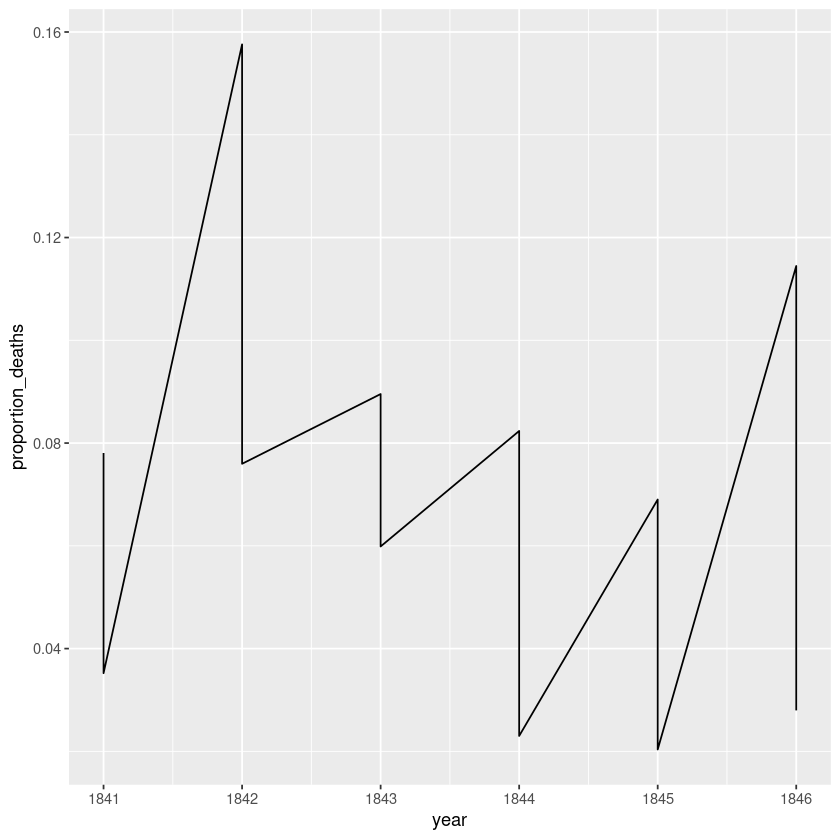

In [29]:
ggplot(yearly,aes(x=year,y=proportion_deaths)) + geom_line() 

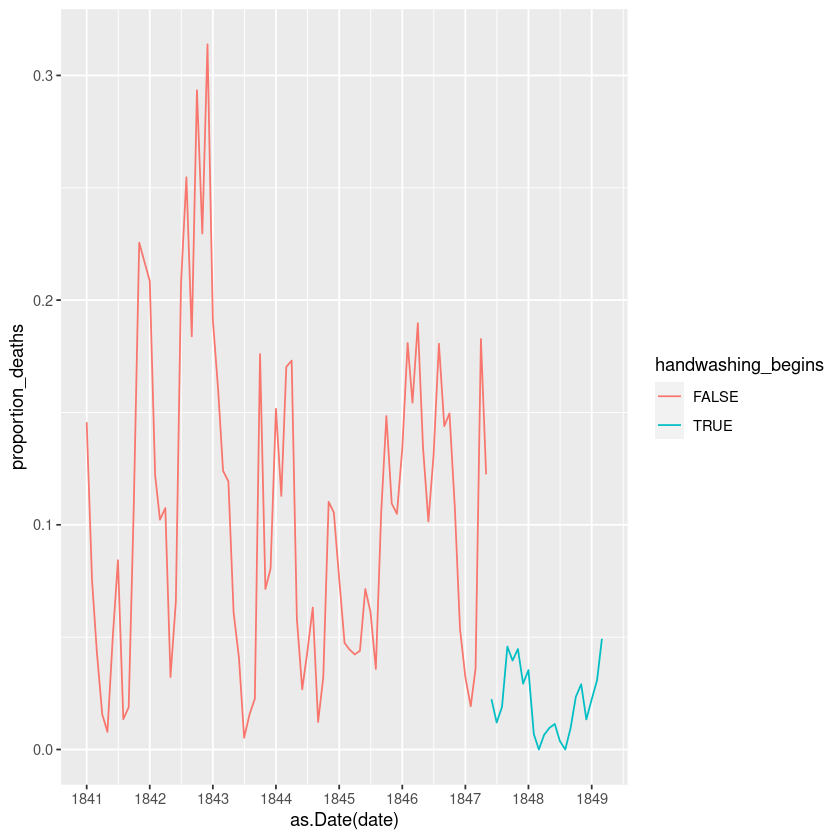

In [30]:
# Add the threshold and flag and plot again with space in the x axis

handwashing_begins = as.Date('1847-06-01')
monthly <- monthly %>% mutate(handwashing_begins = as.Date(date) >= handwashing_begins)

ggplot(monthly, aes(x=as.Date(date), y=proportion_deaths, color=handwashing_begins)) + 
  geom_line() +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") # Adding space in the x axis

In [31]:
monthly_summary <- monthly %>% group_by(handwashing_begins) %>% summarize(mean_proportion_deaths = mean(proportion_deaths))

monthly_summary

handwashing_begins,mean_proportion_deaths
<lgl>,<dbl>
FALSE,0.10504998
TRUE,0.02109338


### Summary - After the residents started washing hands in June 1847,the number of deaths decreased.